In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import seaborn as sns
import albumentations as A
from skimage.exposure import rescale_intensity


import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

In [4]:
def imageProcessing1(df):

        #img = cv2.imread(df)
        # Example IHC image
        ihc_rgb = df#img

        # Separate the stains from the IHC image
        ihc_hed = rgb2hed(ihc_rgb)

        # Create an RGB image for each of the stains
        null = np.zeros_like(ihc_hed[:, :, 0])
        ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))

        ihc_h = ihc_h*255      

   
        image1 = ihc_h.astype('uint8')
   
        # cv2.cvtColor is applied over the
        # image input with applied parameters
        # to convert the image in grayscale 
        image_result = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


        return image_result

In [5]:
def imageProcessing2(df):

        #img = cv2.imread(df)
        # Example IHC image
        ihc_rgb = df#img

        # Separate the stains from the IHC image
        ihc_hed = rgb2hed(ihc_rgb)

        # Create an RGB image for each of the stains
        null = np.zeros_like(ihc_hed[:, :, 0])
        ihc_d = hed2rgb(np.stack((ihc_hed[:, :, 2], null, null), axis=-1))

        ihc_d = ihc_d*255      

   

        image1 = ihc_d.astype('uint8')
   
        # cv2.cvtColor is applied over the
        # image input with applied parameters
        # to convert the image in grayscale 
        image_result = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


        return image_result

In [6]:
def imageProcessing3(df):

        #img = cv2.imread(df)
        # Example IHC image
        ihc_rgb = df#img

        # Separate the stains from the IHC image
        ihc_hed = rgb2hed(ihc_rgb)

        # Create an RGB image for each of the stains
        null = np.zeros_like(ihc_hed[:, :, 0])
        # Rescale hematoxylin and DAB channels and give them a fluorescence look
        h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))
        d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)))
        

        # Cast the two channels into an RGB image, as the blue and green channels
        # respectively
        zdh = np.dstack((null, d, h))

        zdh = zdh*255      


        image1 = zdh.astype('uint8')
   
        # cv2.cvtColor is applied over the
        # image input with applied parameters
        # to convert the image in grayscale 
        image_result = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


        return image_result

In [7]:
def imageProcessing4(df):

        #img = cv2.imread(df)
       
        img = df
        # Split
        red = img[:, :, 0]

        image_result = red*255


        return image_result

In [8]:
def imageProcessing5(df):

        #img = cv2.imread(df)
        img = df

        # Split
        green = img[:, :, 1]

        image_result = green*255


        return image_result

In [9]:
def imageProcessing6(df):

        #img = cv2.imread(df)
        img = df
        

        # Split
        blue = img[:, :, 2]

        image_result = blue*255


        return image_result

Declaration of a simple preprocessor function.  Preprocessor functions are used to preprocess an instance before labeling it. We use @preprocessor(name,resources) decorator to declare a function as preprocessor.

In [10]:
#from spear.labeling import preprocessor

#@preprocessor(name = "noise_removal")
def imagePreProcessing(df):

        img = cv2.imread(df)
        #Noise Removing
        image = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
        #Gaussian Blur
        gaussian_3 = cv2.GaussianBlur(image, (9,9), 10.0) #unblur
        image = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
        #Laplacian Filter
        #kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) #filter
        #image = cv2.filter2D(image, -1, kernel)
        return image

In [11]:
pre_processed = imagePreProcessing("0.png")

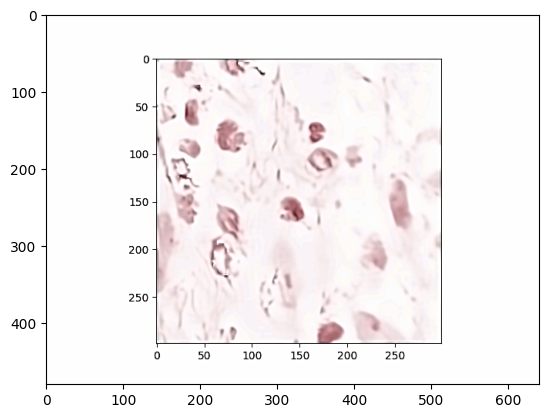

In [12]:
plt.imshow(pre_processed)
plt.show()

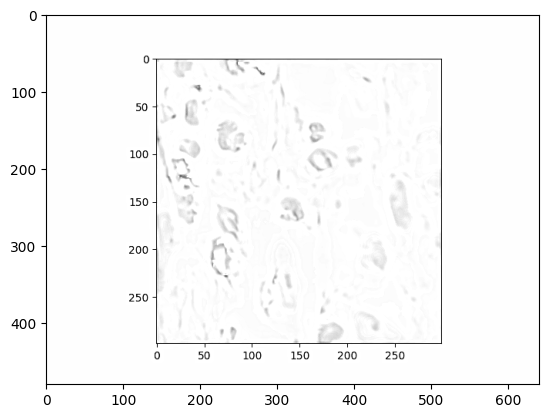

In [13]:
processed1 = imageProcessing1(pre_processed) 
plt.imshow(processed1,cmap='gray')
plt.show()

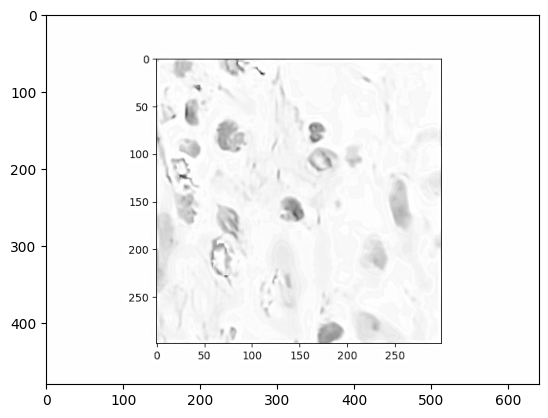

In [14]:
processed2 = imageProcessing2(pre_processed) 
plt.imshow(processed2,cmap='gray')
plt.show()

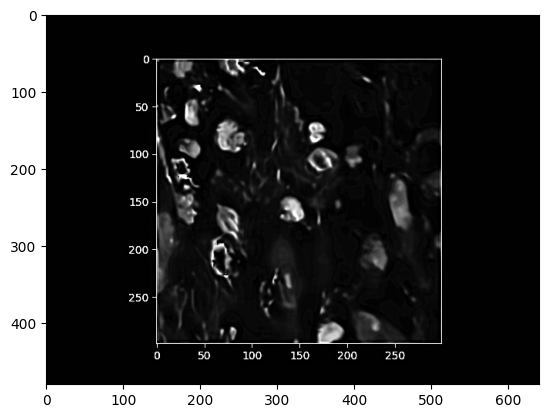

In [15]:
processed3 = imageProcessing3(pre_processed) 
plt.imshow(processed3,cmap='gray')
plt.show()

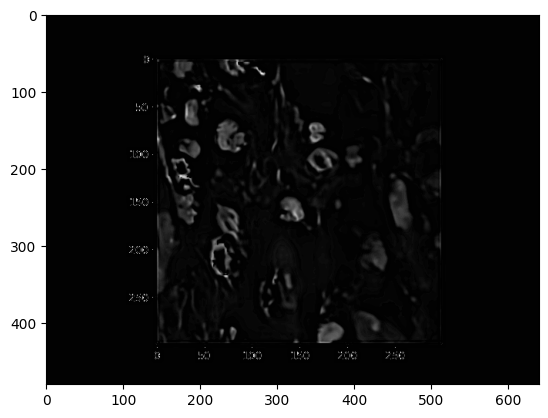

In [16]:
processed4 = imageProcessing4(pre_processed) 
plt.imshow(processed4,cmap='gray')
plt.show()

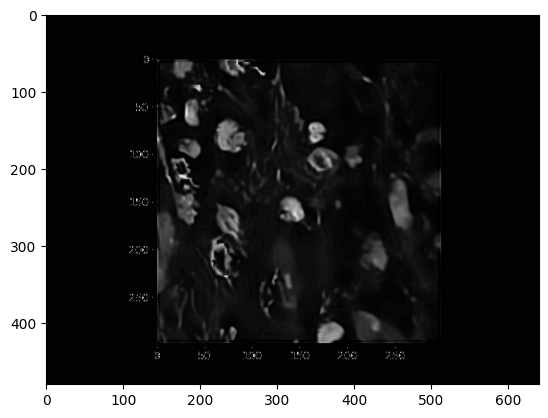

In [17]:
processed5 = imageProcessing5(pre_processed) 
plt.imshow(processed5,cmap='gray')
plt.show()

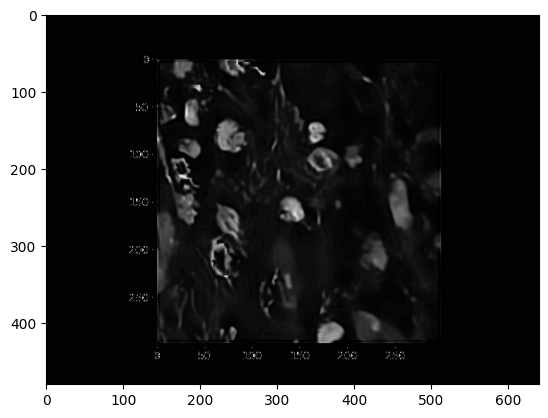

In [18]:
processed5 = imageProcessing5(pre_processed) 
plt.imshow(processed5,cmap='gray')
plt.show()

In [19]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF1(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = 255-image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = area > 100
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        arr = np.array([0,0,0,0])
        for cntr in contours:
            x1,y1,w,h = cv2.boundingRect(cntr)
            x2 = x1+w
            y2 = y1+h
            cv2.rectangle(result, (x1, y1), (x2, y2), colour, thickness)
            arr1 = np.array([x1,x2,y1,y2])
            concat = np.vstack((arr, arr1))
            arr = concat
            #print("Object:", i+1, "x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
            #i += 1    

    return result, concat


In [20]:
result , concat = LF1(processed1, pre_processed)

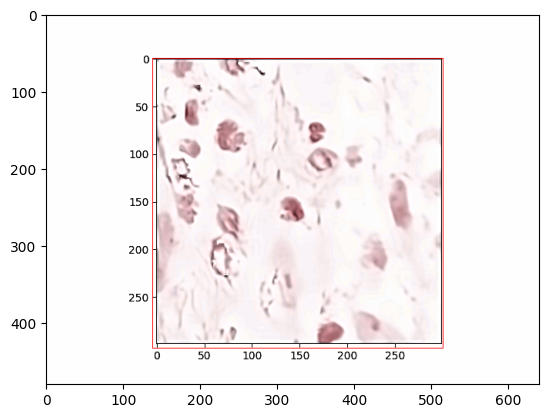

In [21]:
plt.imshow(result)

In [22]:
arr1 = np.delete(concat, 0, axis=0)

In [23]:
arr1

array([[138, 515,  57, 433]])

In [24]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF2(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = 255-image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = area > 100
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        arr = np.array([0,0,0,0])
        for cntr in contours:
            x1,y1,w,h = cv2.boundingRect(cntr)
            x2 = x1+w
            y2 = y1+h
            cv2.rectangle(result, (x1, y1), (x2, y2), colour, thickness)
            arr1 = np.array([x1,x2,y1,y2])
            concat = np.vstack((arr, arr1))
            arr = concat
            #print("Object:", i+1, "x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
            #i += 1    

    return result, concat


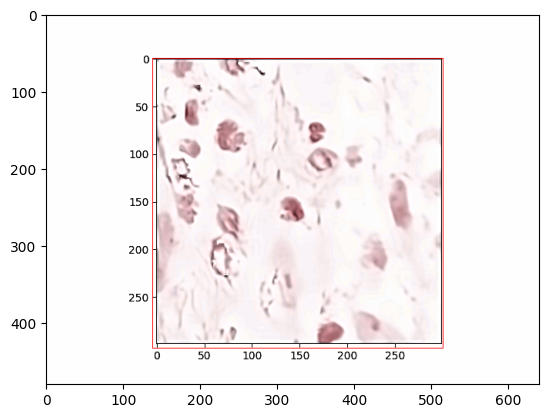

In [25]:
result2 , concat2 = LF2(processed2, pre_processed)
plt.imshow(result2)

In [26]:
arr2 = np.delete(concat2, 0, axis=0)
arr2

array([[138, 515,  57, 433]])

In [27]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF3(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = area > 100
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        arr = np.array([0,0,0,0])
        for cntr in contours:
            x1,y1,w,h = cv2.boundingRect(cntr)
            x2 = x1+w
            y2 = y1+h
            cv2.rectangle(result, (x1, y1), (x2, y2), colour, thickness)
            arr1 = np.array([x1,x2,y1,y2])
            concat = np.vstack((arr, arr1))
            arr = concat
            #print("Object:", i+1, "x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
            #i += 1    

    return result, concat


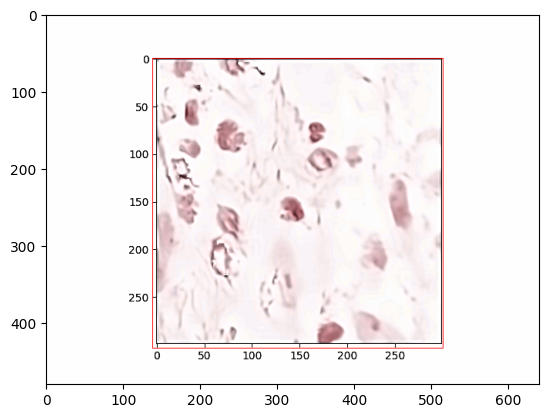

In [28]:
result3 , concat3 = LF3(processed3, pre_processed)
plt.imshow(result3)

In [29]:
arr3 = np.delete(concat3, 0, axis=0)
arr3

array([[138, 515,  57, 433]])

In [30]:
#@labeling_function(resources=dict(keywords=trigWord1),pre=[convert_to_lower],label=ClassLabels.SPAM)
def LF4(c, d): 
    
    image = d
    img = c
    # applying different thresholding 
    # techniques on the input image
    # Otsu's thresholding after Gaussian filtering
    # Apply GaussianBlur to reduce image noise if it is required

    blur = cv2.GaussianBlur(img,(5,5),0)
    otsu_threshold, image_result = cv2.threshold(
         blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
    
    thresh2 = image_result

    output = cv2.connectedComponentsWithStats(thresh2)
    (numLabels, labels, stats, centroids) = output
    mask = np.zeros(thresh2.shape, dtype="uint8")

    # loop over the number of unique connected component labels, skipping
    # over the first label (as label zero is the background)
    for i in range(1, numLabels):
        # extract the connected component statistics for the current label
        x = stats[i, cv2.CC_STAT_LEFT]
        y = stats[i, cv2.CC_STAT_TOP]
        w = stats[i, cv2.CC_STAT_WIDTH]
        h = stats[i, cv2.CC_STAT_HEIGHT]
        area = stats[i, cv2.CC_STAT_AREA]
    
        # ensure the width, height, and area are all neither too small
        # nor too big
        #keepWidth = w > 5 and w < 30
        #keepHeight = h > 5 and h < 30
        #keepArea = area > 10

        keepWidth = w > 20
        keepHeight = h > 20
        keepArea = area > 100
        # ensure the connected component we are examining passes all
        # three tests
        if all((keepWidth, keepHeight, keepArea)):
            # construct a mask for the current connected component and
            # then take the bitwise OR with the mask       
            componentMask = (labels == i).astype("uint8") * 1
            mask = cv2.bitwise_or(mask, componentMask)


        # Multiple objects
        result = image.copy()
        contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        colour = (255, 0, 0)
        thickness = 1
        i = 0
        
        arr = np.array([0,0,0,0])
        for cntr in contours:
            x1,y1,w,h = cv2.boundingRect(cntr)
            x2 = x1+w
            y2 = y1+h
            cv2.rectangle(result, (x1, y1), (x2, y2), colour, thickness)
            arr1 = np.array([x1,x2,y1,y2])
            concat = np.vstack((arr, arr1))
            arr = concat
            #print("Object:", i+1, "x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
            #i += 1    

    return result, concat


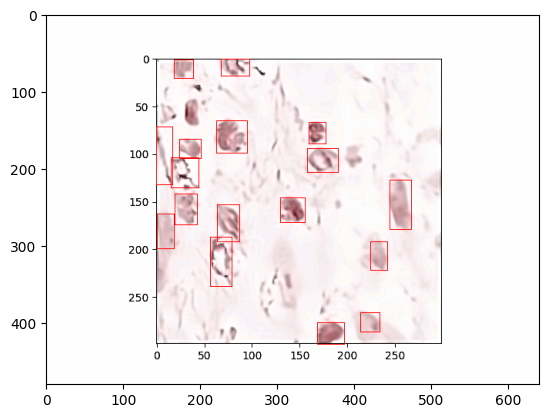

In [31]:
result4 , concat4 = LF4(processed4, pre_processed)
plt.imshow(result4)

In [32]:
arr3 = np.delete(concat4, 0, axis=0)
arr3

array([[352, 387, 400, 428],
       [408, 433, 387, 412],
       [421, 443, 295, 332],
       [213, 241, 289, 353],
       [144, 166, 259, 304],
       [222, 251, 247, 295],
       [304, 336, 238, 270],
       [167, 196, 233, 273],
       [446, 474, 215, 279],
       [162, 198, 186, 225],
       [339, 379, 174, 205],
       [173, 201, 162, 187],
       [143, 164, 146, 221],
       [341, 363, 140, 168],
       [221, 261, 138, 180],
       [166, 191,  59,  83],
       [227, 264,  58,  80]])

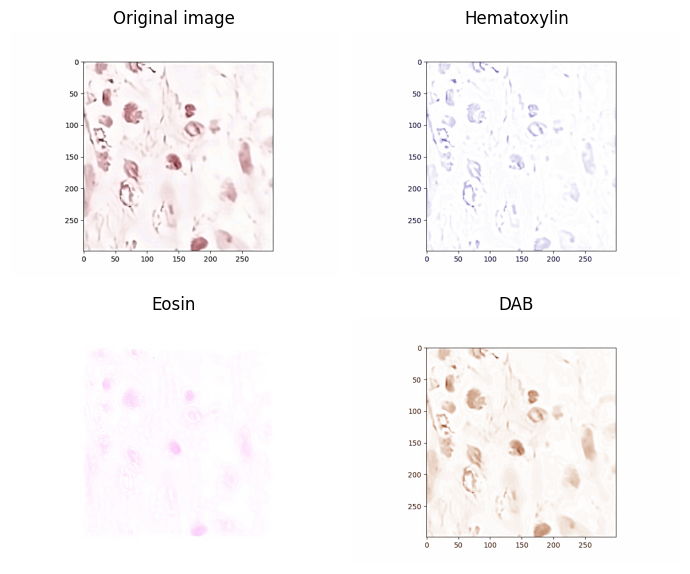

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = pre_processed

# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

#Code Written by Sasank for IoU Ranking

In [93]:
#Defining IoU between two Bounding boxes for Ranking
def IoU_2(x1_l,y1_d,x1_r,y1_u,x2_l,y2_d,x2_r,y2_u):

    area1 = (x1_r-x1_l)*(y1_u-y1_d)
    area2 = (x2_r-x2_l)*(y2_u-y2_d)
    cx_l = max(x1_l,x2_l)
    cx_r = min(x1_r,x2_r)
    cy_d = max(y1_d,y2_d)
    cy_u = min(y1_u,y2_u)
    common_area = (cx_r-cx_l)*(cy_u-cy_d)
    if((cx_r-cx_l)<0 or (cy_u-cy_d)<0):
        common_area = 0
    # print(x1_l,y1_d,x1_r,y1_u)
    # print(x2_l,y2_d,x2_r,y2_u)
    # print(cx_l,cy_d,cx_r,cy_u)
    # print(area1,area2,common_area)
    # print("-----------------------------------------------------------")
    iou = common_area/(area1+area2-common_area)
    return iou

In [79]:
import pandas as pd

#Stored as 4 files for each LF 
#Each row in file is Image_name BBox(x1,x2,y1,y2) IoU Ranking 

def LF_Labels(): 
    df1 = pd.DataFrame(columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])
    df2 = pd.DataFrame(columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])
    df3 = pd.DataFrame(columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])
    df4 = pd.DataFrame(columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])

    for i in range(757):
        print(i)
        try:
            pre_processed = imagePreProcessing(str(i)+".png")
        except:
            print("MISSING IMAGE "+str(i))
            continue
        
        processed1 = imageProcessing1(pre_processed) 
        processed2 = imageProcessing2(pre_processed) 
        processed3 = imageProcessing3(pre_processed) 
        processed4 = imageProcessing4(pre_processed) 
        # processed5 = imageProcessing5(pre_processed)
        try:
            result1 , concat1 = LF1(processed1, pre_processed)
            result2 , concat2 = LF2(processed2, pre_processed)
            result3 , concat3 = LF3(processed3, pre_processed)
            result4 , concat4 = LF4(processed4, pre_processed)
        except:
            continue
        
        concat1 = np.delete(concat1, 0, axis=0)#All bboxes for LF1
        concat2 = np.delete(concat2, 0, axis=0)#All bboxes for LF2
        concat3 = np.delete(concat3, 0, axis=0)#All bboxes for LF3
        concat4 = np.delete(concat4, 0, axis=0)#All bboxes for LF4


        concat1 = np.concatenate([np.full((concat1.shape[0],1),str(i)+".png"),    concat1,      np.full((concat1.shape[0],1),0)], axis=1)
        concat2 = np.concatenate([np.full((concat2.shape[0],1),str(i)+".png"),    concat2,      np.full((concat2.shape[0],1),0)], axis=1)
        concat3 = np.concatenate([np.full((concat3.shape[0],1),str(i)+".png"),    concat3,      np.full((concat3.shape[0],1),0)], axis=1)
        concat4 = np.concatenate([np.full((concat4.shape[0],1),str(i)+".png"),    concat4,      np.full((concat4.shape[0],1),0)], axis=1)

        # print(df1)

        # concat1 = np.concatenate([np.full((concat1.shape[0],1),".png"),    concat1,      np.full((concat1.shape[0],1),0)], axis=1)
        df1 = pd.concat([df1, pd.DataFrame(concat1,columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])], axis=0)

        # concat2 = np.concatenate([np.full((concat2.shape[0],1),".png"),    concat2,      np.full((concat2.shape[0],1),0)], axis=1)
        df2 = pd.concat([df2, pd.DataFrame(concat2,columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])], axis=0)

        # concat3 = np.concatenate([np.full((concat3.shape[0],1),".png"),    concat3,      np.full((concat3.shape[0],1),0)], axis=1)
        df3 = pd.concat([df3, pd.DataFrame(concat3,columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])], axis=0)
        
        # concat4 = np.concatenate([np.full((concat4.shape[0],1),".png"),    concat4,      np.full((concat4.shape[0],1),0)], axis=1)
        df4 = pd.concat([df4, pd.DataFrame(concat4,columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])], axis=0)

    return df1,df2,df3,df4
        
df1,df2,df3,df4 = LF_Labels()

0
1
2
3
4
5
6
7
8
9
10
11
12
MISSING IMAGE 12
13


[ WARN:0@5322.974] global loadsave.cpp:244 findDecoder imread_('12.png'): can't open/read file: check file path/integrity


14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
MISSING IMAGE 41
42


[ WARN:0@5338.146] global loadsave.cpp:244 findDecoder imread_('41.png'): can't open/read file: check file path/integrity


43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
MISSING IMAGE 60
61


[ WARN:0@5347.942] global loadsave.cpp:244 findDecoder imread_('60.png'): can't open/read file: check file path/integrity


62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
MISSING IMAGE 81
82


[ WARN:0@5358.677] global loadsave.cpp:244 findDecoder imread_('81.png'): can't open/read file: check file path/integrity


83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
MISSING IMAGE 98
99


[ WARN:0@5367.299] global loadsave.cpp:244 findDecoder imread_('98.png'): can't open/read file: check file path/integrity


100
101
102
103
104
105
106
MISSING IMAGE 106
107


[ WARN:0@5371.087] global loadsave.cpp:244 findDecoder imread_('106.png'): can't open/read file: check file path/integrity


108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
MISSING IMAGE 124
125


[ WARN:0@5380.577] global loadsave.cpp:244 findDecoder imread_('124.png'): can't open/read file: check file path/integrity


126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
MISSING IMAGE 142
143


[ WARN:0@5390.014] global loadsave.cpp:244 findDecoder imread_('142.png'): can't open/read file: check file path/integrity


144
145
146
147
148
149
150
151
MISSING IMAGE 151
152


[ WARN:0@5394.771] global loadsave.cpp:244 findDecoder imread_('151.png'): can't open/read file: check file path/integrity


153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
MISSING IMAGE 172
173


[ WARN:0@5405.738] global loadsave.cpp:244 findDecoder imread_('172.png'): can't open/read file: check file path/integrity


174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
MISSING IMAGE 191
192


[ WARN:0@5416.209] global loadsave.cpp:244 findDecoder imread_('191.png'): can't open/read file: check file path/integrity


193
194
195
196
197
198
199
200
201
202
203
204
MISSING IMAGE 204
205


[ WARN:0@5423.030] global loadsave.cpp:244 findDecoder imread_('204.png'): can't open/read file: check file path/integrity


206
207
208
209
210
211
212
213
214
215
216
217
218
219
MISSING IMAGE 219
220


[ WARN:0@5431.090] global loadsave.cpp:244 findDecoder imread_('219.png'): can't open/read file: check file path/integrity


221
222
223
224
225
226
227
228
229
230
231
232
MISSING IMAGE 232
233


[ WARN:0@5437.811] global loadsave.cpp:244 findDecoder imread_('232.png'): can't open/read file: check file path/integrity


234
235
236
237
238
239
240
241
242
MISSING IMAGE 242
243


[ WARN:0@5443.124] global loadsave.cpp:244 findDecoder imread_('242.png'): can't open/read file: check file path/integrity


244
245
246
247
248
249
MISSING IMAGE 249
250


[ WARN:0@5446.413] global loadsave.cpp:244 findDecoder imread_('249.png'): can't open/read file: check file path/integrity


251
252
253
254
255
256
MISSING IMAGE 256
257


[ WARN:0@5450.001] global loadsave.cpp:244 findDecoder imread_('256.png'): can't open/read file: check file path/integrity


258
259
260
261
262
263
264
MISSING IMAGE 264
265


[ WARN:0@5454.291] global loadsave.cpp:244 findDecoder imread_('264.png'): can't open/read file: check file path/integrity


266
267
268
269
270
271
272
273
274
275
276
277
MISSING IMAGE 277
278


[ WARN:0@5461.092] global loadsave.cpp:244 findDecoder imread_('277.png'): can't open/read file: check file path/integrity


279
280
281
282
283
284
285
MISSING IMAGE 285
286


[ WARN:0@5465.289] global loadsave.cpp:244 findDecoder imread_('285.png'): can't open/read file: check file path/integrity


287
288
289
290
291
292
MISSING IMAGE 292
293


[ WARN:0@5468.692] global loadsave.cpp:244 findDecoder imread_('292.png'): can't open/read file: check file path/integrity


294
295
296
297
298
299
300
301
MISSING IMAGE 301
302


[ WARN:0@5473.314] global loadsave.cpp:244 findDecoder imread_('301.png'): can't open/read file: check file path/integrity


303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
MISSING IMAGE 320
321


[ WARN:0@5483.330] global loadsave.cpp:244 findDecoder imread_('320.png'): can't open/read file: check file path/integrity


322
323
324
325
326
327
328
329
330
331
332
MISSING IMAGE 332
333


[ WARN:0@5489.438] global loadsave.cpp:244 findDecoder imread_('332.png'): can't open/read file: check file path/integrity


334
335
336
337
338
339
340
341
342
MISSING IMAGE 342
343


[ WARN:0@5494.426] global loadsave.cpp:244 findDecoder imread_('342.png'): can't open/read file: check file path/integrity


344
345
346
347
348
349
350
351
352
353
MISSING IMAGE 353
354


[ WARN:0@5500.353] global loadsave.cpp:244 findDecoder imread_('353.png'): can't open/read file: check file path/integrity


355
356
357
358
359
360
361
362
363
MISSING IMAGE 363
364


[ WARN:0@5505.515] global loadsave.cpp:244 findDecoder imread_('363.png'): can't open/read file: check file path/integrity


365
366
367
368
369
370
MISSING IMAGE 370
371


[ WARN:0@5508.993] global loadsave.cpp:244 findDecoder imread_('370.png'): can't open/read file: check file path/integrity


372
373
374
375
376
377
378
379
380
381
MISSING IMAGE 381
382


[ WARN:0@5514.735] global loadsave.cpp:244 findDecoder imread_('381.png'): can't open/read file: check file path/integrity


383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
MISSING IMAGE 404
405


[ WARN:0@5527.191] global loadsave.cpp:244 findDecoder imread_('404.png'): can't open/read file: check file path/integrity


406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
MISSING IMAGE 423
424


[ WARN:0@5538.421] global loadsave.cpp:244 findDecoder imread_('423.png'): can't open/read file: check file path/integrity


425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
MISSING IMAGE 447
448


[ WARN:0@5552.424] global loadsave.cpp:244 findDecoder imread_('447.png'): can't open/read file: check file path/integrity


449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
MISSING IMAGE 465
466


[ WARN:0@5562.079] global loadsave.cpp:244 findDecoder imread_('465.png'): can't open/read file: check file path/integrity


467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
MISSING IMAGE 489
490


[ WARN:0@5575.116] global loadsave.cpp:244 findDecoder imread_('489.png'): can't open/read file: check file path/integrity


491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
MISSING IMAGE 510
511


[ WARN:0@5586.347] global loadsave.cpp:244 findDecoder imread_('510.png'): can't open/read file: check file path/integrity


512
513
514
515
516
517
518
519
520
MISSING IMAGE 520
521


[ WARN:0@5591.489] global loadsave.cpp:244 findDecoder imread_('520.png'): can't open/read file: check file path/integrity


522
523
524
525
526
527
528
529
530
531
532
MISSING IMAGE 532
533


[ WARN:0@5598.036] global loadsave.cpp:244 findDecoder imread_('532.png'): can't open/read file: check file path/integrity


534
535
536
537
538
539
540
541
542
543
544
545
MISSING IMAGE 545
546


[ WARN:0@5604.794] global loadsave.cpp:244 findDecoder imread_('545.png'): can't open/read file: check file path/integrity


547
548
549
550
551
552
553
554
555
556
557
558
559
MISSING IMAGE 559
560


[ WARN:0@5612.270] global loadsave.cpp:244 findDecoder imread_('559.png'): can't open/read file: check file path/integrity


561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
MISSING IMAGE 585
586


[ WARN:0@5626.816] global loadsave.cpp:244 findDecoder imread_('585.png'): can't open/read file: check file path/integrity


587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
MISSING IMAGE 609
610


[ WARN:0@5640.710] global loadsave.cpp:244 findDecoder imread_('609.png'): can't open/read file: check file path/integrity


611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
MISSING IMAGE 632
633


[ WARN:0@5653.582] global loadsave.cpp:244 findDecoder imread_('632.png'): can't open/read file: check file path/integrity


634
635
636
637
638
639
640
641
642
643
644
645
MISSING IMAGE 645
646


[ WARN:0@5660.767] global loadsave.cpp:244 findDecoder imread_('645.png'): can't open/read file: check file path/integrity


647
648
649
650
651
652
653
MISSING IMAGE 653
654


[ WARN:0@5664.918] global loadsave.cpp:244 findDecoder imread_('653.png'): can't open/read file: check file path/integrity


655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
MISSING IMAGE 669
670


[ WARN:0@5673.737] global loadsave.cpp:244 findDecoder imread_('669.png'): can't open/read file: check file path/integrity


671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
MISSING IMAGE 690
691


[ WARN:0@5688.043] global loadsave.cpp:244 findDecoder imread_('690.png'): can't open/read file: check file path/integrity


692
693
694
695
696
697
698
699
700
701
702
703
704
MISSING IMAGE 704
705


[ WARN:0@5698.821] global loadsave.cpp:244 findDecoder imread_('704.png'): can't open/read file: check file path/integrity


706
707
708
709
710
711
712
713
714
715
716
MISSING IMAGE 716
717


[ WARN:0@5706.861] global loadsave.cpp:244 findDecoder imread_('716.png'): can't open/read file: check file path/integrity


718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
MISSING IMAGE 742
743


[ WARN:0@5723.471] global loadsave.cpp:244 findDecoder imread_('742.png'): can't open/read file: check file path/integrity


744
745
746
747
748
749
750
751
752
753
MISSING IMAGE 753
754


[ WARN:0@5730.144] global loadsave.cpp:244 findDecoder imread_('753.png'): can't open/read file: check file path/integrity


755
756


In [80]:
# saving the dataframes to a CSV format
df1.to_csv('LF1.csv')
df2.to_csv('LF2.csv')
df3.to_csv('LF3.csv')
df4.to_csv('LF4.csv')

#I have got the BBoxes into a CSV file format which has Image,X_Left,Y_Down,X_Right,Y_Up,IoU_Score format.

#Now have to update the IoU_Score for each patch with other patches.

In [94]:
df1 = pd.read_csv('LF1.csv')
df2 = pd.read_csv('LF2.csv')
df3 = pd.read_csv('LF3.csv')
df4 = pd.read_csv('LF4.csv')

for ind in df4.index:
    X_Left,Y_Down,X_Right,Y_Up = df4['X_Left'][ind], df4['Y_Down'][ind], df4['X_Right'][ind], df4['Y_Up'][ind]
    iou = 0
    for ind1 in df4.index:
        x_Left,y_Down,x_Right,y_Up = df4['X_Left'][ind1], df4['Y_Down'][ind1], df4['X_Right'][ind1], df4['Y_Up'][ind1]
        iou += IoU_2(X_Left,Y_Down,X_Right,Y_Up,    x_Left,y_Down,x_Right,y_Up)
    df4['IoU Score'] = iou
print(df4)

/tmp/ipykernel_64796/3678232220.py:18: RuntimeWarning: invalid value encountered in long_scalars
  iou = common_area/(area1+area2-common_area)


      Unnamed: 0    Image  X_Left  Y_Down  X_Right  Y_Up  IoU Score
0              0    0.png     352     387      400   428        0.0
1              1    0.png     408     433      387   412        0.0
2              2    0.png     421     443      295   332        0.0
3              3    0.png     213     241      289   353        0.0
4              4    0.png     144     166      259   304        0.0
...          ...      ...     ...     ...      ...   ...        ...
2268           0  751.png     143     513       59   428        0.0
2269           0  752.png     143     513       59   428        0.0
2270           0  754.png     144     514       59   427        0.0
2271           0  755.png     144     514       59   427        0.0
2272           0  756.png     144     514       59   427        0.0

[2273 rows x 7 columns]


In [62]:
import pandas as pd

pre_processed = imagePreProcessing(str(0)+".png")
processed1 = imageProcessing1(pre_processed) 
processed2 = imageProcessing2(pre_processed) 
processed3 = imageProcessing3(pre_processed) 
processed4 = imageProcessing4(pre_processed) 
# processed5 = imageProcessing5(pre_processed)

result1 , concat1 = LF1(processed1, pre_processed)
result2 , concat2 = LF2(processed2, pre_processed)
result3 , concat3 = LF3(processed3, pre_processed)
result4 , concat4 = LF4(processed4, pre_processed)

concat1 = np.delete(concat1, 0, axis=0)#All bboxes for LF1
concat2 = np.delete(concat2, 0, axis=0)#All bboxes for LF2
concat3 = np.delete(concat3, 0, axis=0)#All bboxes for LF3
concat4 = np.delete(concat4, 0, axis=0)#All bboxes for LF4

df = pd.DataFrame(columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])
concat1 = np.concatenate([np.full((concat1.shape[0],1),".png"),    concat1,      np.full((concat1.shape[0],1),0)], axis=1)
df = pd.concat([df, pd.DataFrame(concat1,columns=["Image","X_Left","Y_Down","X_Right","Y_Up","IoU Score"])], axis=0)

In [63]:
df

,Image,X_Left,Y_Down,X_Right,Y_Up,IoU Score
0,.png,138,515,57,433,0


In [103]:
import h5py

filename = "test.h5"

h5 = h5py.File(filename,'r')

print(list(h5.keys()))

dset = h5['x']
print(dset)

h5.close()

['organ', 'x']
<HDF5 dataset "x": shape (12000, 299, 299, 3), type "|u1">
